This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [ ]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

In [ ]:
x = tf.zeros(shape=(2, 1))
print(x)

**Random tensors**

In [ ]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

In [ ]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

**NumPy arrays are assignable**

In [ ]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**Creating a TensorFlow variable**

In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

**Assigning a value to a TensorFlow variable**

In [ ]:
v.assign(tf.ones((3, 1)))

**Assigning a value to a subset of a TensorFlow variable**

In [ ]:
v[0, 0].assign(3.)

**Using `assign_add`**

In [ ]:
v.assign_add(tf.ones((3, 1)))

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [ ]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

#### A second look at the GradientTape API

**Using the `GradientTape`**

In [ ]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

**Using `GradientTape` with constant tensor inputs**

In [ ]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**Using nested gradient tapes to compute second-order gradients**

In [ ]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [ ]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [31]:
import numpy as np
num_samples_per_class = 500
negative_samples = np.random.multivariate_normal( 
    mean=[2, 3],
    cov=[[1, 0.2],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal( 
    mean=[3, 1],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)


<ipython-input-31-5fb7ade8d6cf>:3: RuntimeWarning: covariance is not positive-semidefinite.
  negative_samples = np.random.multivariate_normal(


In [67]:
from tensorflow import keras
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)

SyntaxError: ignored

**Stacking the two classes into an array with shape (2000, 2)**

In [43]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [44]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

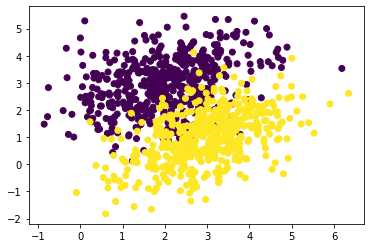

In [56]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [57]:
import tensorflow as tf
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [58]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [59]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [61]:
learning_rate = 0.05

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [62]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.7514
Loss at step 1: 0.3196
Loss at step 2: 0.1670
Loss at step 3: 0.1537
Loss at step 4: 0.1498
Loss at step 5: 0.1470
Loss at step 6: 0.1448
Loss at step 7: 0.1429
Loss at step 8: 0.1413
Loss at step 9: 0.1398
Loss at step 10: 0.1385
Loss at step 11: 0.1372
Loss at step 12: 0.1360
Loss at step 13: 0.1349
Loss at step 14: 0.1339
Loss at step 15: 0.1328
Loss at step 16: 0.1318
Loss at step 17: 0.1308
Loss at step 18: 0.1299
Loss at step 19: 0.1290
Loss at step 20: 0.1281
Loss at step 21: 0.1272
Loss at step 22: 0.1264
Loss at step 23: 0.1255
Loss at step 24: 0.1247
Loss at step 25: 0.1239
Loss at step 26: 0.1231
Loss at step 27: 0.1224
Loss at step 28: 0.1216
Loss at step 29: 0.1209
Loss at step 30: 0.1202
Loss at step 31: 0.1195
Loss at step 32: 0.1188
Loss at step 33: 0.1182
Loss at step 34: 0.1175
Loss at step 35: 0.1169
Loss at step 36: 0.1163
Loss at step 37: 0.1157
Loss at step 38: 0.1151
Loss at step 39: 0.1145


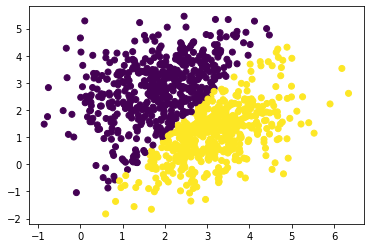

In [63]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

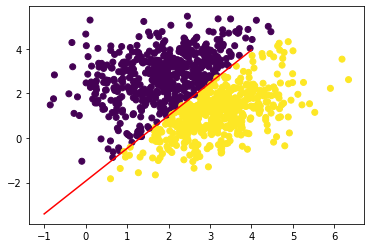

In [64]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [ ]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

#### Automatic shape inference: Building layers on the fly

In [ ]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [ ]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [ ]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

In [ ]:
history.history

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [65]:
from tensorflow import keras
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
44/44 [==============================] - 1s 6ms/step - loss: 0.6086 - binary_accuracy: 0.8600 - val_loss: 0.1784 - val_binary_accuracy: 0.7433
Epoch 2/5
44/44 [==============================] - 0s 3ms/step - loss: 0.1881 - binary_accuracy: 0.7900 - val_loss: 0.2918 - val_binary_accuracy: 0.6600
Epoch 3/5
44/44 [==============================] - 0s 3ms/step - loss: 0.1594 - binary_accuracy: 0.8229 - val_loss: 0.1471 - val_binary_accuracy: 0.8067
Epoch 4/5
44/44 [==============================] - 0s 4ms/step - loss: 0.1991 - binary_accuracy: 0.7686 - val_loss: 0.1021 - val_binary_accuracy: 0.8800
Epoch 5/5
44/44 [==============================] - 0s 3ms/step - loss: 0.1723 - binary_accuracy: 0.8057 - val_loss: 0.1080 - val_binary_accuracy: 0.9267


### Inference: Using a model after training

In [66]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

3/3 [==============================] - 0s 3ms/step
[[ 0.05075321]
 [ 0.4016634 ]
 [-0.45048243]
 [ 0.18429714]
 [ 0.21226734]
 [ 0.02281076]
 [ 0.00401509]
 [-0.5033356 ]
 [ 0.6333572 ]
 [ 0.8082818 ]]


## Summary